In [5]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

from BinSpectra import random_noise_dataset
from BinSpectra import lowres_dataset
import warnings
from cycler import cycler
import random

PATH = '../Data/DataProducts/'

In [6]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)

def replace_flux_with_noise(phase):
    """
    Replaces the flux in the input spectrum with random Gaussian noise.
    Parameters
    ----------
    phase : integer, phase of the dataset.
    
    Returns
    -------
    dataset with flux of each spectra replaced by random Gaussian noise.
    """
    datain = loaddata(phase)
    dataset_randn = random_noise_dataset(datain)
    return dataset_randn

def run_PCA_lowres(phase, b_len, dphase=5):
    """
    Runs PCA with lower resolutions of the spectrum.
    Parameters
    ----------
    phase : integer, phase of the dataset.
    b_len : the desired bining length of the output spectrum.
    
    Returns
    -------
    Principle components
    """
    warnings.filterwarnings('ignore')
    dataset = replace_flux_with_noise(phase)
    dataset_lowres = lowres_dataset(dataset, b_len)
    snidPCA = SNePCA.SNePCA(dataset_lowres, phase - dphase, phase + dphase)
    snidPCA.snidPCA()
    snidPCA.calcPCACoeffs()
    return snidPCA


def run_PCA_fullres(phase, dphase=5):
    """
    Runs PCA with full resolutions of the spectrum.
    Parameters
    ----------
    phase : integer, phase of the dataset.
        
    Returns
    -------
    Principle components
    """
    warnings.filterwarnings('ignore')
    dataset = replace_flux_with_noise(phase)
    snidPCA = SNePCA.SNePCA(dataset, phase - dphase, phase + dphase)
    snidPCA.snidPCA()
    snidPCA.calcPCACoeffs()
    return snidPCA

## Accuracy from binomial distribution

## SVM scores for full resolution random noise

### Phase 0

SVM score: 0.292000 ± 0.097000


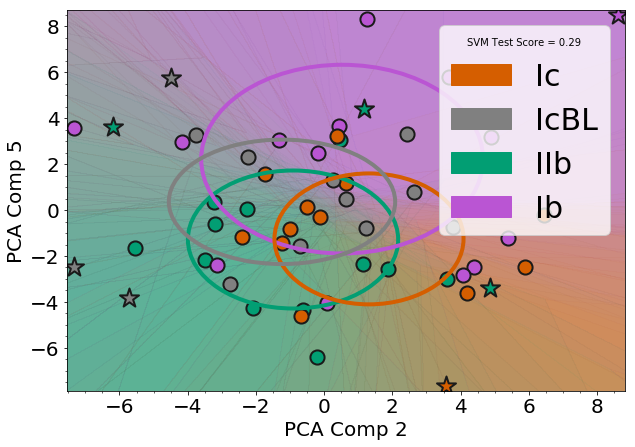

In [10]:
snidPCA = run_PCA_fullres(0, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
f_all,svmsc, av0, std0=snidPCA.pcaPlot(2,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=None, ax=None,ncv=50, markOutliers=True)
print(u"SVM score: %f \u00B1 %f" %(round(av0, 3), round(std0, 3)))

In [11]:
av0 + std0, av0 - std0

(0.38875041809658806, 0.19477899366811793)

### Phase 5

SVM score: 0.224000 ± 0.087000


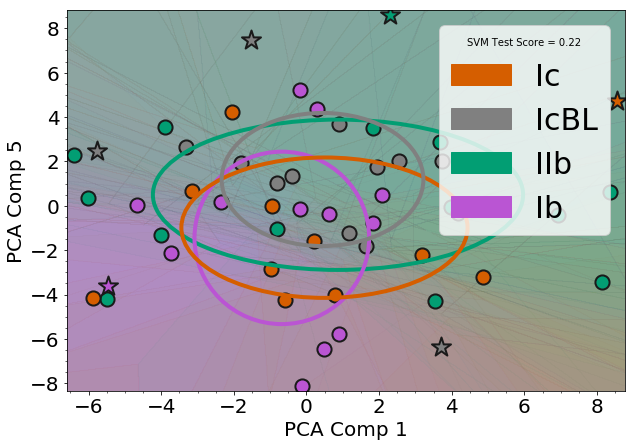

In [12]:
snidPCA = run_PCA_fullres(5, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
f_all,svmsc, av5, std5=snidPCA.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=None, ax=None,ncv=50, markOutliers=True)
print(u"SVM score: %f \u00B1 %f" %(round(av5, 3), round(std5, 3)))

In [13]:
av5 + std5, av5 - std5

(0.31043369223792905, 0.13706630776207096)

### Phase 10

SVM score: 0.219000 ± 0.089000


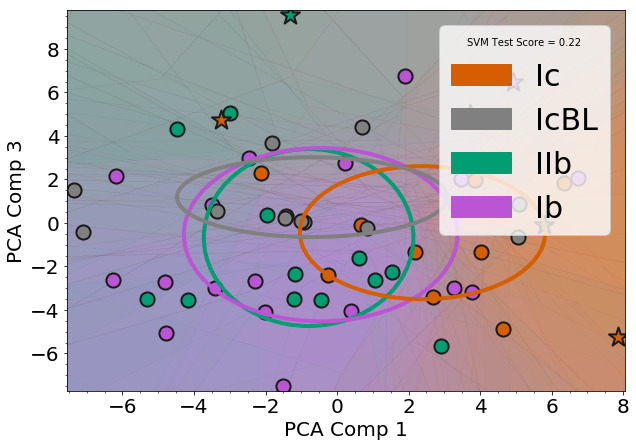

In [15]:
snidPCA = run_PCA_fullres(10, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
f_all,svmsc, av10, std10=snidPCA.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=None, ax=None,ncv=50, markOutliers=True)
print(u"SVM score: %f \u00B1 %f" %(round(av10, 3), round(std10, 3)))

In [16]:
av10 + std10, av10 - std10

(0.3076762710047022, 0.12997078781882732)

### Phase 15

SVM score: 0.367059 ± 0.095982


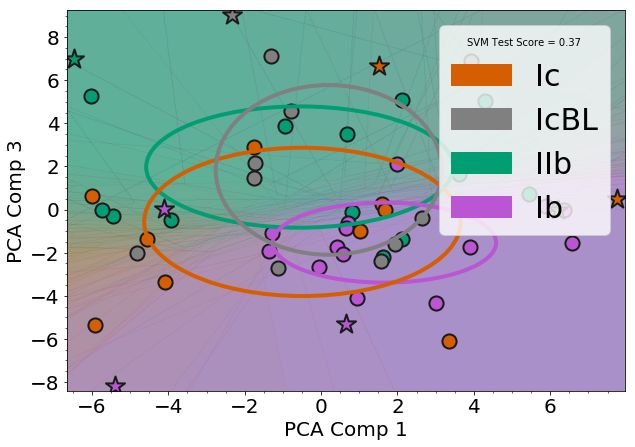

In [24]:
snidPCA = run_PCA_fullres(15, dphase=5)
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
f_all,svmsc, av15, std15=snidPCA.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=None, ax=None,ncv=50, markOutliers=True)
print(u"SVM score: %2f \u00B1 %2f" %(av15, std15))

In [25]:
av15 + std15, av15 - std15

(0.4630403673146877, 0.27107727974413576)